In [1]:
import numpy as np
import sys

# from parse_sc_data import print_daq_capture, getFileList, parse_sram_errors_per_packet, print_data_from_parsed_dataframe, hex32, bin32, parse_packet_errors
from parse_sc_data import parse_sram_errors_per_packet, print_data_from_parsed_dataframe, checkErr, merge_jsons, sram_data, getParsedTables
import pandas as pd

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"));

import glob

import os
import json

import matplotlib.pyplot as plt

import mplhep as hep
from cycler import cycler

color_cycle =  ['#3f90da','#ffa90e','#bd1f01','#94a4a2','#832db6','#a96b59','#e76300','#b9ac70','#717581','#92dadd']
hep.style.use(["CMS", {"axes.prop_cycle": cycler("color", color_cycle)} ])

plt.figure(figsize=(8,8));


<Figure size 800x800 with 0 Axes>

In [2]:
directory_path_to_jsons = '../COB103_Modifications/'

cols = ['n_packets','word_count','error_count','isOBErrors','isSingleError_MultiBit','isSingleError_SingleBit','isBadPacketCRC','isBadPacketHeader','PP_bist_01','OB_bist_01']

fname_initial = f'{directory_path_to_jsons}/report_TID__chip_COB103_ECOND_2025-02-03_15-07-06.json'

fname_firstWBpull = f'{directory_path_to_jsons}/report_TID__chip_COB103_ECOND_2025-02-04_12-16-45.json'
fname_secondWBpull = f'{directory_path_to_jsons}/report_TID__chip_COB103_ECOND_2025-02-04_15-02-44.json'
fname_secondWBpull_v2 = f'{directory_path_to_jsons}/report_TID__chip_COB103_ECOND_2025-02-04_16-56-18.json'


In [3]:
# #parse and save data to a csv (for easy and fast re-loading)

# _f = fname_secondWBpull_v2
# df, df_packet, df_bist = getParsedTables(_f)

# df.to_csv(_f.replace('.json','_totals.csv'))
# df_packet.to_csv(_f.replace('.json','_packets.csv'))

In [4]:
d_initial =  pd.read_csv(fname_initial.replace('.json','_totals.csv'),index_col=0)

d_firstWBpull =  pd.read_csv(fname_firstWBpull.replace('.json','_totals.csv'),index_col=0)

d_secondWBpull =  pd.read_csv(fname_secondWBpull.replace('.json','_totals.csv'),index_col=0)
d_secondWBpull_v2 =  pd.read_csv(fname_secondWBpull_v2.replace('.json','_totals.csv'),index_col=0)


In [5]:
d_initial[cols]

,n_packets,word_count,error_count,isOBErrors,isSingleError_MultiBit,isSingleError_SingleBit,isBadPacketCRC,isBadPacketHeader,PP_bist_01,OB_bist_01
voltages,,,,,,,,,,
0.95,427,452525290,310276227,0,0,0,283,364,111011111111,111111111111
0.96,428,454967446,311841155,0,0,0,281,361,111011111111,111111111111
0.97,425,454925475,309497515,0,0,0,288,362,111011111111,111111111111
0.98,449,450186047,239191947,0,0,0,370,362,111011111111,111111111111
0.99,871,452366852,24015703,14,4,55,653,188,111011111111,111111111111
1.00,1929,405098700,238118,8,1,1823,71,9,111111111111,111111111111
1.01,2048,406752961,185053,0,0,2048,0,0,111111111111,111111111111
1.02,1536,401957792,98831,0,0,1536,0,0,111111111111,111111111111
1.03,1536,441558905,64466,0,0,1536,0,0,111111111111,111111111111


In [6]:
d_firstWBpull[cols]

,n_packets,word_count,error_count,isOBErrors,isSingleError_MultiBit,isSingleError_SingleBit,isBadPacketCRC,isBadPacketHeader,PP_bist_01,OB_bist_01
voltages,,,,,,,,,,
0.95,425,428705628,293276077,0,0,0,286,354,111011111111,111111111111
0.96,426,454689064,311276727,0,0,0,280,363,111011111111,111111111111
0.97,428,453526160,308295584,0,0,0,284,364,111011111111,111111111111
0.98,479,449566791,210108872,0,0,0,413,349,111011111111,111111111111
0.99,865,449911733,26249721,14,0,59,642,187,111111111111,111111111111
1.00,1499,407546130,233294,1,0,1468,23,3,111111111111,111111111111
1.01,1536,408410917,197485,0,0,1536,0,0,111111111111,111111111111
1.02,2048,414512186,106465,0,0,2048,0,0,111111111111,111111111111
1.03,1536,424861088,62626,0,0,1536,0,0,111111111111,111111111111


In [7]:
d_secondWBpull[cols]

,n_packets,word_count,error_count,isOBErrors,isSingleError_MultiBit,isSingleError_SingleBit,isBadPacketCRC,isBadPacketHeader,PP_bist_01,OB_bist_01
voltages,,,,,,,,,,
0.95,428,438845868,300692599,0,0,0,283,365,111011111111,111111111111
0.96,427,453404870,310526580,0,0,0,284,359,111011111111,111111111111
0.97,428,452960695,300133881,0,0,0,292,367,111011111111,111111111111
0.98,468,451737958,199042551,0,0,0,412,351,111011111111,111111111111
0.99,1082,449567997,9626598,27,0,154,687,168,111011111111,111111111111
1.00,2003,421213465,220122,2,0,1956,25,3,111111111111,111111111111
1.01,1536,414571081,183159,0,0,1536,0,0,111111111111,111111111111
1.02,2048,415150402,90004,0,0,2048,0,0,111111111111,111111111111
1.03,1536,424613564,59885,0,0,1536,0,0,111111111111,111111111111


In [8]:
# d_secondWBpull_v2[cols]

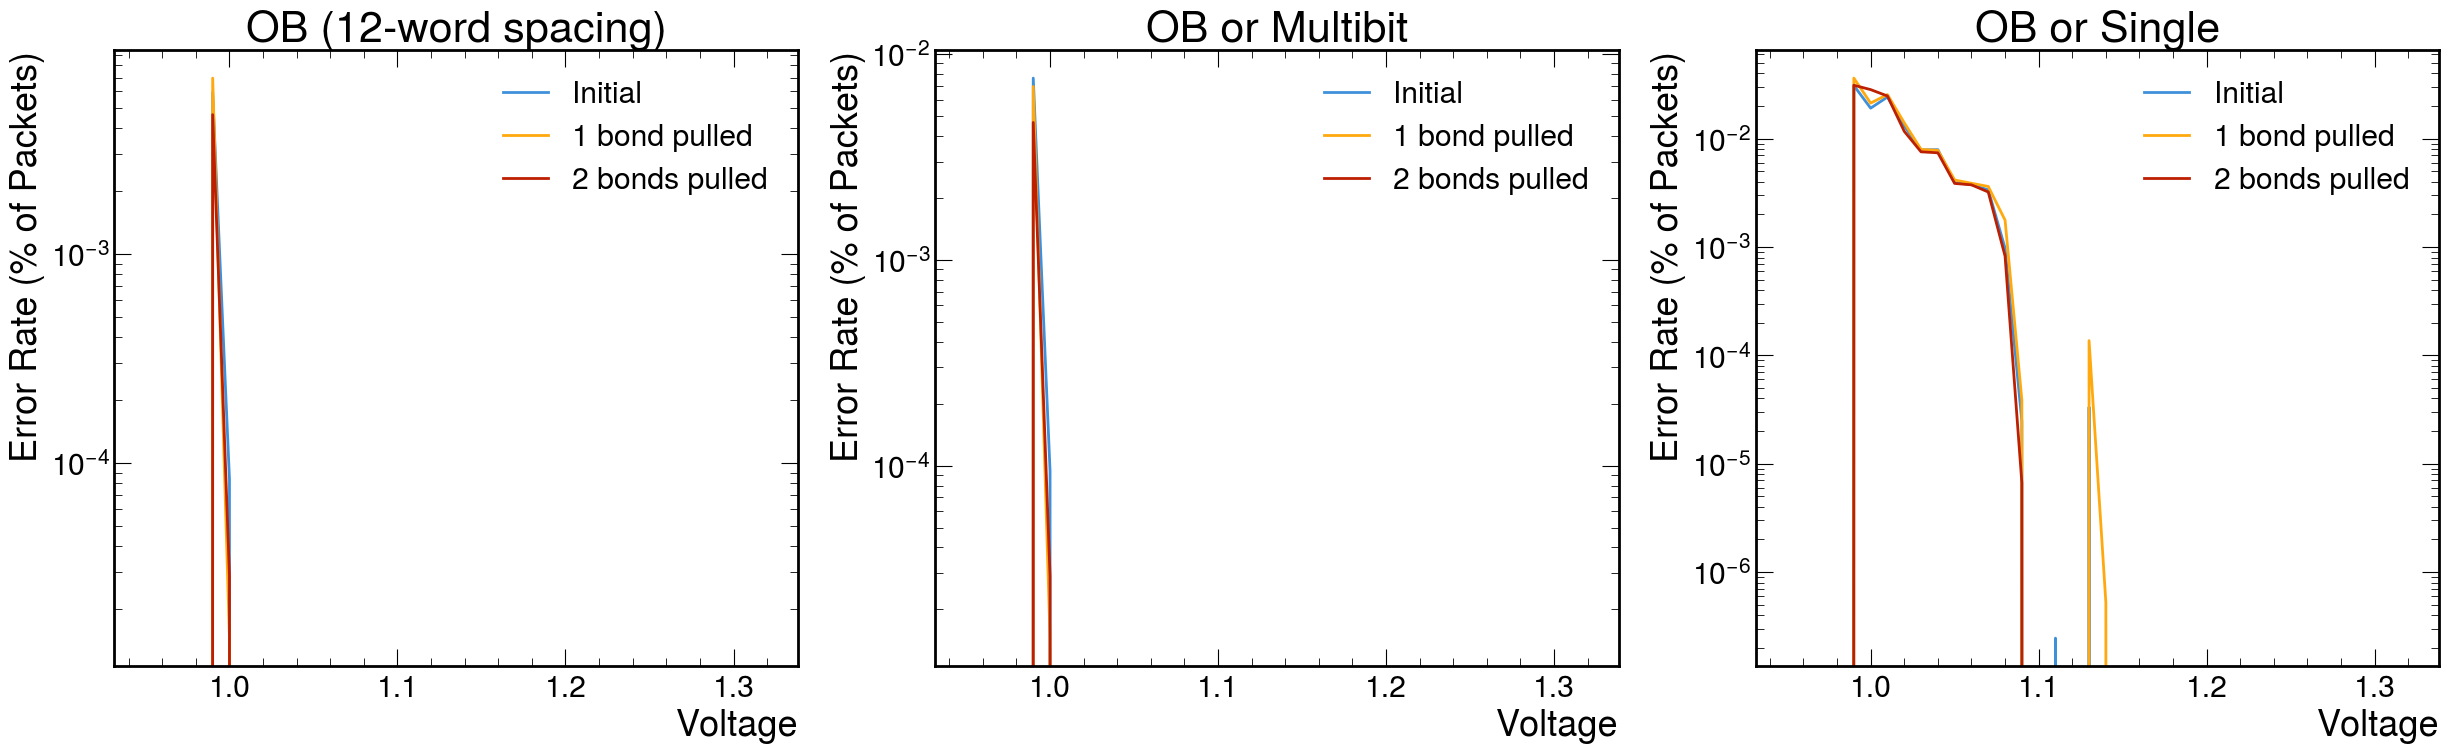

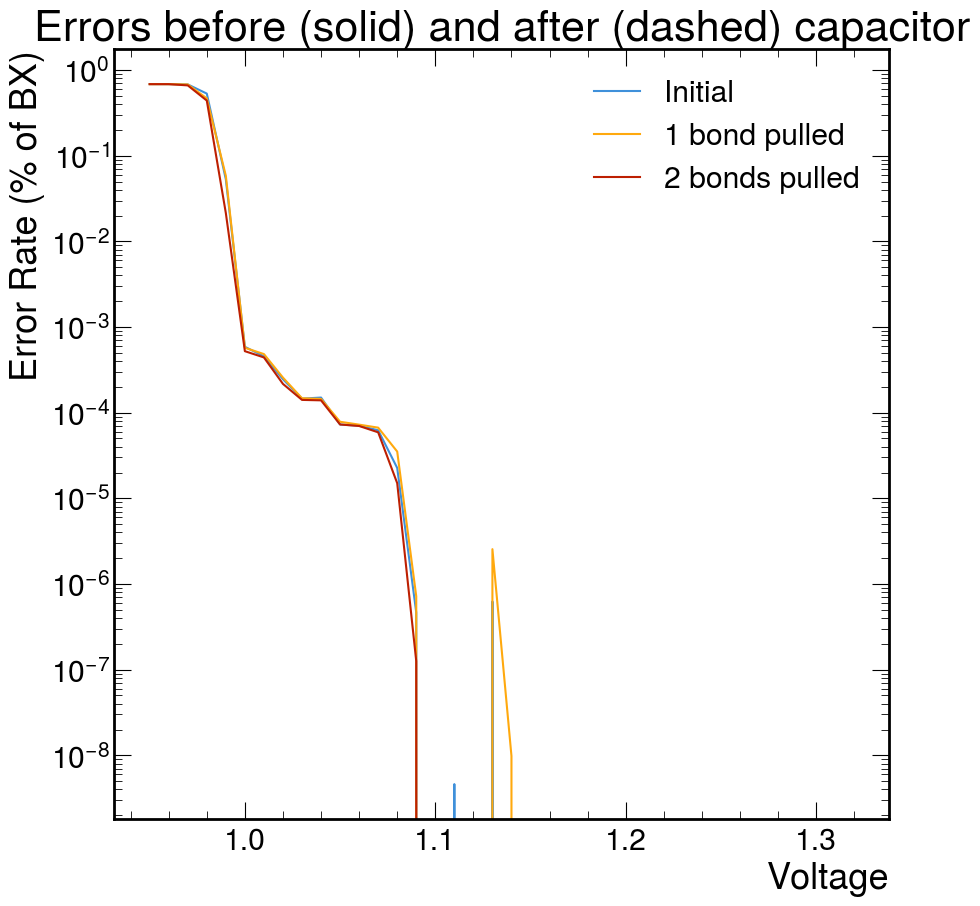

In [9]:

err_tot, err_ob, err_ob_multi, err_ob_single = [],[],[],[]

data = [d_initial,d_firstWBpull, d_secondWBpull]

for i,x in enumerate(data):
    n_packets = x.n_captured_bx/3564*67
    err_tot.append(x.error_count/x.word_count)
    err_ob.append(x.isOBErrors.values/n_packets)
    err_ob_multi.append((x.isOBErrors + x.isSingleError_MultiBit).values/n_packets)
    err_ob_single.append((x.isOBErrors + x.isSingleError_MultiBit + x.isSingleError_SingleBit).values/n_packets)


errs = [err_ob,err_ob_multi, err_ob_single]
titles = ['OB (12-word spacing)','OB or Multibit','OB or Single']
# labels = ['Initial','w/ Cap','1 Corner Short','2 Corner Shorts','3 Corner Shorts','More Modifications']
labels = ['Initial','1 bond pulled', '2 bonds pulled']

fig,axs = plt.subplots(1,3,figsize=(30,8))
for i in range(3): #error type
    for j in range(len(data)): #Modification iteration
        axs[i].plot(data[j].index.values, errs[i][j], color=color_cycle[j],label=labels[j],linewidth=2)
    axs[i].set_yscale('log')
    axs[i].legend()
    axs[i].set_title(titles[i])
    axs[i].set_ylabel('Error Rate (% of Packets)')
    axs[i].set_xlabel('Voltage')

    
plt.figure()
for i in range(len(data)):
    plt.plot(data[i].index.values, err_tot[i], color=color_cycle[i],label=labels[i])
plt.yscale('log')
plt.ylabel('Error Rate (% of BX)')
plt.xlabel('Voltage')
plt.title('Errors before (solid) and after (dashed) capacitor')
plt.legend()
    